In [12]:
import numpy as np
import pandas as pd

In [13]:
import matplotlib.pyplot as plt
import seaborn as sb

In [14]:
health_adm_data = pd.read_csv("HDHI Admission data.csv", delimiter=',')
health_adm_data['OUTCOME'].unique()

array(['DISCHARGE', 'EXPIRY', 'DAMA'], dtype=object)

In [15]:
health_adm_data.columns

Index(['SNO', 'MRD No.', 'D.O.A', 'D.O.D', 'AGE', 'GENDER', 'RURAL',
       'TYPE OF ADMISSION-EMERGENCY/OPD', 'month year', 'DURATION OF STAY',
       'duration of intensive unit stay', 'OUTCOME', 'SMOKING ', 'ALCOHOL',
       'DM', 'HTN', 'CAD', 'PRIOR CMP', 'CKD', 'HB', 'TLC', 'PLATELETS',
       'GLUCOSE', 'UREA', 'CREATININE', 'BNP', 'RAISED CARDIAC ENZYMES', 'EF',
       'SEVERE ANAEMIA', 'ANAEMIA', 'STABLE ANGINA', 'ACS', 'STEMI',
       'ATYPICAL CHEST PAIN', 'HEART FAILURE', 'HFREF', 'HFNEF', 'VALVULAR',
       'CHB', 'SSS', 'AKI', 'CVA INFRACT', 'CVA BLEED', 'AF', 'VT', 'PSVT',
       'CONGENITAL', 'UTI', 'NEURO CARDIOGENIC SYNCOPE', 'ORTHOSTATIC',
       'INFECTIVE ENDOCARDITIS', 'DVT', 'CARDIOGENIC SHOCK', 'SHOCK',
       'PULMONARY EMBOLISM', 'CHEST INFECTION'],
      dtype='object')

In [16]:
health_adm_data = health_adm_data.drop(labels=["MRD No.", "D.O.A", "D.O.D", "month year", "duration of intensive unit stay", "PRIOR CMP", "SEVERE ANAEMIA",
                                              "HB","TLC", "PLATELETS", "GLUCOSE", "UREA", "CREATININE", "RAISED CARDIAC ENZYMES", "EF",
                                              "STABLE ANGINA","STEMI", "ATYPICAL CHEST PAIN", "HFREF", "HFNEF", "VALVULAR","CHB", "SSS", "CVA INFRACT", "CVA BLEED", "AF",
                                               "VT","PSVT", "CONGENITAL", "UTI", "NEURO CARDIOGENIC SYNCOPE", "ORTHOSTATIC", "INFECTIVE ENDOCARDITIS", "DVT",
                                               "CARDIOGENIC SHOCK", "PULMONARY EMBOLISM" ], axis = 1 )

In [17]:
health_adm_data.dtypes

SNO                                 int64
AGE                                 int64
GENDER                             object
RURAL                              object
TYPE OF ADMISSION-EMERGENCY/OPD    object
DURATION OF STAY                    int64
OUTCOME                            object
SMOKING                             int64
ALCOHOL                             int64
DM                                  int64
HTN                                 int64
CAD                                 int64
CKD                                 int64
BNP                                object
ANAEMIA                             int64
ACS                                 int64
HEART FAILURE                       int64
AKI                                 int64
SHOCK                               int64
CHEST INFECTION                    object
dtype: object

In [18]:
health_adm_data.isna().sum()

SNO                                   0
AGE                                   0
GENDER                                0
RURAL                                 0
TYPE OF ADMISSION-EMERGENCY/OPD       0
DURATION OF STAY                      0
OUTCOME                               0
SMOKING                               0
ALCOHOL                               0
DM                                    0
HTN                                   0
CAD                                   0
CKD                                   0
BNP                                8441
ANAEMIA                               0
ACS                                   0
HEART FAILURE                         0
AKI                                   0
SHOCK                                 0
CHEST INFECTION                       0
dtype: int64

In [19]:
health_adm_data_cleaned = health_adm_data[(health_adm_data['BNP'].notna()) & (health_adm_data['BNP'] != 'EMPTY') ]
health_adm_data_cleaned.loc[:,'SNO'] = range(1, len(health_adm_data_cleaned) + 1)


In [20]:

# Convert BNP to numeric, replacing any non-numeric entries with NaN
health_adm_data_cleaned['BNP'] = pd.to_numeric(health_adm_data_cleaned['BNP'], errors='coerce')
health_adm_data_cleaned.loc[:,'BNP'] = health_adm_data_cleaned['BNP'].astype(int)
health_adm_data_cleaned['CHEST INFECTION'] = pd.to_numeric(health_adm_data_cleaned['BNP'], errors='coerce')
health_adm_data_cleaned.loc[:,'CHEST INFECTION'] = health_adm_data_cleaned['CHEST INFECTION'].astype(int)


C:\Users\USER\AppData\Local\Temp\ipykernel_20048\2650128375.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  health_adm_data_cleaned['BNP'] = pd.to_numeric(health_adm_data_cleaned['BNP'], errors='coerce')
C:\Users\USER\AppData\Local\Temp\ipykernel_20048\2650128375.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  health_adm_data_cleaned['CHEST INFECTION'] = pd.to_numeric(health_adm_data_cleaned['BNP'], errors='coerce')


In [21]:
health_adm_data_cleaned.dtypes

SNO                                  int64
AGE                                  int64
GENDER                              object
RURAL                               object
TYPE OF ADMISSION-EMERGENCY/OPD     object
DURATION OF STAY                     int64
OUTCOME                             object
SMOKING                              int64
ALCOHOL                              int64
DM                                   int64
HTN                                  int64
CAD                                  int64
CKD                                  int64
BNP                                float64
ANAEMIA                              int64
ACS                                  int64
HEART FAILURE                        int64
AKI                                  int64
SHOCK                                int64
CHEST INFECTION                    float64
dtype: object

In [22]:
health_adm_data_cleaned.isna().sum()

SNO                                0
AGE                                0
GENDER                             0
RURAL                              0
TYPE OF ADMISSION-EMERGENCY/OPD    0
DURATION OF STAY                   0
OUTCOME                            0
SMOKING                            0
ALCOHOL                            0
DM                                 0
HTN                                0
CAD                                0
CKD                                0
BNP                                0
ANAEMIA                            0
ACS                                0
HEART FAILURE                      0
AKI                                0
SHOCK                              0
CHEST INFECTION                    0
dtype: int64

In [23]:
health_adm_data_cleaned.loc[:,'Lifestyle_Risks'] = (health_adm_data_cleaned['SMOKING '] + health_adm_data_cleaned['ALCOHOL']).astype(float).astype(int) 


C:\Users\USER\AppData\Local\Temp\ipykernel_20048\609702178.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  health_adm_data_cleaned.loc[:,'Lifestyle_Risks'] = (health_adm_data_cleaned['SMOKING '] + health_adm_data_cleaned['ALCOHOL']).astype(float).astype(int)


In [24]:
health_adm_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6676 entries, 0 to 15756
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   SNO                              6676 non-null   int64  
 1   AGE                              6676 non-null   int64  
 2   GENDER                           6676 non-null   object 
 3   RURAL                            6676 non-null   object 
 4   TYPE OF ADMISSION-EMERGENCY/OPD  6676 non-null   object 
 5   DURATION OF STAY                 6676 non-null   int64  
 6   OUTCOME                          6676 non-null   object 
 7   SMOKING                          6676 non-null   int64  
 8   ALCOHOL                          6676 non-null   int64  
 9   DM                               6676 non-null   int64  
 10  HTN                              6676 non-null   int64  
 11  CAD                              6676 non-null   int64  
 12  CKD                     

## Descriptive Analyst

In [26]:
health_adm_data_cleaned.describe()

,SNO,AGE,DURATION OF STAY,SMOKING,ALCOHOL,DM,HTN,CAD,CKD,BNP,ANAEMIA,ACS,HEART FAILURE,AKI,SHOCK,CHEST INFECTION,Lifestyle_Risks
count,6676.000000,6676.000000,6676.000000,6676.000000,6676.000000,6676.000000,6676.000000,6676.000000,6676.000000,6676.000000,6676.000000,6676.000000,6676.000000,6676.000000,6676.000000,6676.000000,6676.000000
mean,3338.500000,63.988916,7.453265,0.039095,0.046435,0.319503,0.510485,0.696225,0.134512,817.846165,0.232025,0.404134,0.478580,0.292990,0.060515,817.846165,0.085530
std,1927.339531,12.861109,5.448381,0.193836,0.210441,0.466319,0.499927,0.459921,0.341227,997.756993,0.422157,0.490760,0.499578,0.455168,0.238457,997.756993,0.325257
min,1.000000,10.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000
25%,1669.750000,56.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,120.000000,0.000000,0.000000,0.000000,0.000000,0.000000,120.000000,0.000000
50%,3338.500000,65.000000,6.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,470.500000,0.000000,0.000000,0.000000,0.000000,0.000000,470.500000,0.000000
75%,5007.250000,73.000000,9.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1100.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1100.000000,0.000000
max,6676.000000,110.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5000.000000,2.000000


In [27]:
health_adm_data_cleaned['Lifestyle_Risks'].value_counts()

Lifestyle_Risks
0    6197
1     387
2      92
Name: count, dtype: int64

## Identifying outliers

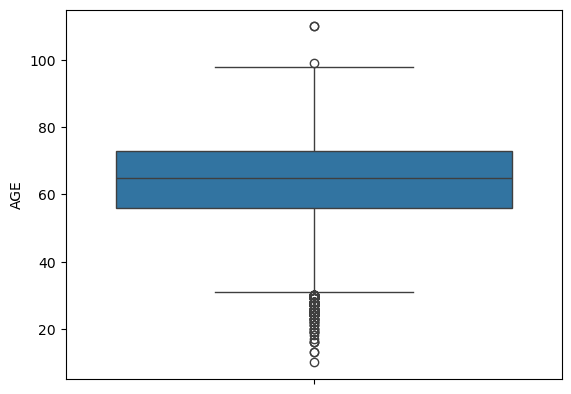

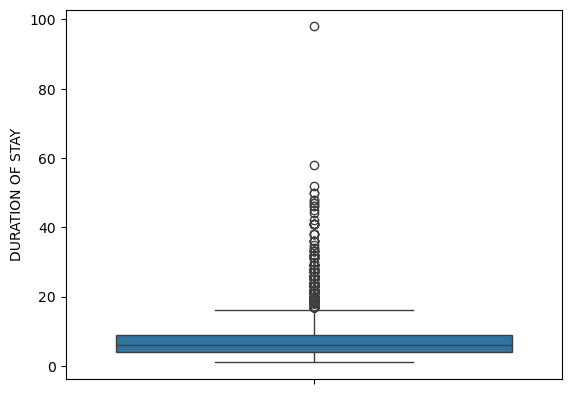

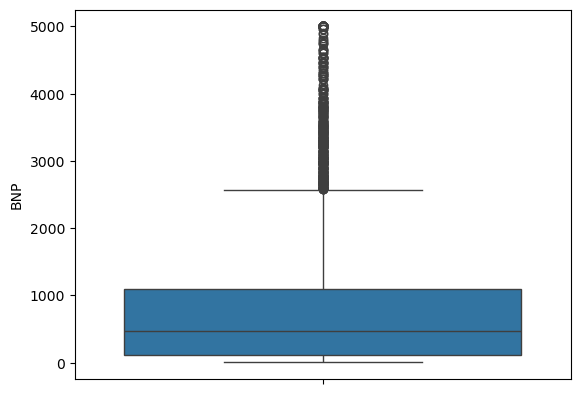

In [29]:
sb.boxplot(health_adm_data_cleaned['AGE'])
plt.show()
sb.boxplot(health_adm_data_cleaned['DURATION OF STAY'])
plt.show()
sb.boxplot(health_adm_data_cleaned['BNP'])
plt.show()


## Categorical Data Distribution

In [31]:
health_adm_data_cleaned['OUTCOME'].value_counts()

OUTCOME
DISCHARGE    5602
EXPIRY        611
DAMA          463
Name: count, dtype: int64

<b>checking outliers account how many % of data </b>

In [33]:
len(health_adm_data_cleaned)

6676

In [34]:
Q1 = health_adm_data_cleaned['AGE'].quantile(0.25)
Q3 = health_adm_data_cleaned['AGE'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 -IQR * 1.5
upper_bound = Q3 +IQR * 1.5
x = len(health_adm_data_cleaned[(health_adm_data_cleaned['AGE'] < lower_bound) | (health_adm_data_cleaned['AGE'] > upper_bound)])
x


120

In [35]:
Q1 = health_adm_data_cleaned['DURATION OF STAY'].quantile(0.25)
Q3 = health_adm_data_cleaned['DURATION OF STAY'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 -IQR * 1.5
upper_bound = Q3 +IQR * 1.5
x = len(health_adm_data_cleaned[(health_adm_data_cleaned['DURATION OF STAY'] < lower_bound) | (health_adm_data_cleaned['DURATION OF STAY'] > upper_bound)])
x


371

In [36]:
Q1 = health_adm_data_cleaned['BNP'].quantile(0.25)
Q3 = health_adm_data_cleaned['BNP'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 -IQR * 1.5
upper_bound = Q3 +IQR * 1.5
x = len(health_adm_data_cleaned[(health_adm_data_cleaned['BNP'] < lower_bound) | (health_adm_data_cleaned['BNP'] > upper_bound)])
x


436

<b> Using heatmap to check correlation between independent variables</b>

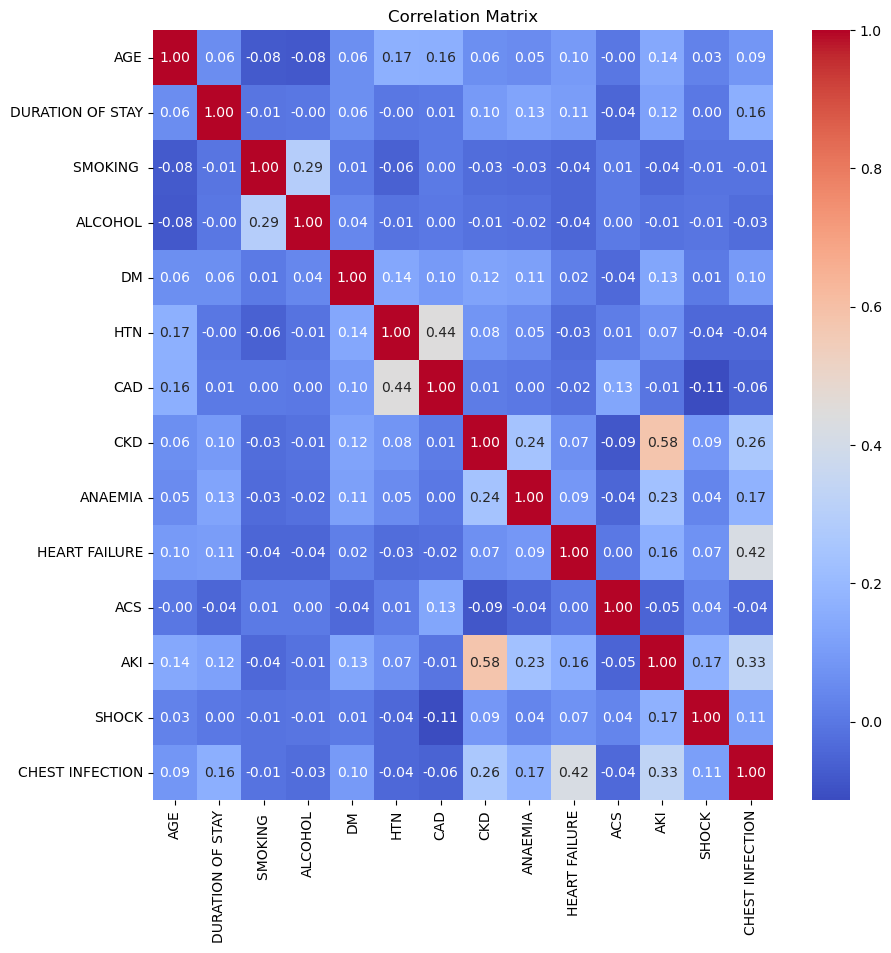

In [38]:

#correlation matrix
corr_matrix = health_adm_data_cleaned[['AGE', 'DURATION OF STAY', 'SMOKING ', 'ALCOHOL', 'DM', 'HTN', 'CAD', 'CKD', 'ANAEMIA', 'HEART FAILURE', 'ACS', 'AKI', 'SHOCK',
       'CHEST INFECTION']].corr()

# Plot correlation matrix
plt.figure(figsize=(10, 10))
sb.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


In [39]:
health_adm_data_cleaned.columns

Index(['SNO', 'AGE', 'GENDER', 'RURAL', 'TYPE OF ADMISSION-EMERGENCY/OPD',
       'DURATION OF STAY', 'OUTCOME', 'SMOKING ', 'ALCOHOL', 'DM', 'HTN',
       'CAD', 'CKD', 'BNP', 'ANAEMIA', 'ACS', 'HEART FAILURE', 'AKI', 'SHOCK',
       'CHEST INFECTION', 'Lifestyle_Risks'],
      dtype='object')

<b>Independent variables vs Dependent variables </b>

In [41]:
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(health_adm_data_cleaned['OUTCOME'], health_adm_data_cleaned['RURAL'])
chi2_stat,p_value,dof,expected_freq = chi2_contingency(contingency_table)
p_value

0.001124830939720249

In [42]:
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(health_adm_data_cleaned['OUTCOME'], health_adm_data_cleaned['CHEST INFECTION'])
chi2_stat,p_value,dof,expected_freq = chi2_contingency(contingency_table)
p_value

3.445004668607068e-19

In [43]:
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(health_adm_data_cleaned['OUTCOME'], health_adm_data_cleaned['Lifestyle_Risks'])
chi2_stat,p_value,dof,expected_freq = chi2_contingency(contingency_table)
p_value

0.00017638113360862775

In [44]:
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(health_adm_data_cleaned['OUTCOME'], health_adm_data_cleaned['TYPE OF ADMISSION-EMERGENCY/OPD'])
chi2_stat,p_value,dof,expected_freq = chi2_contingency(contingency_table)
p_value

5.536747028798474e-30

<b> Group of variables vs Dependent variable </b>

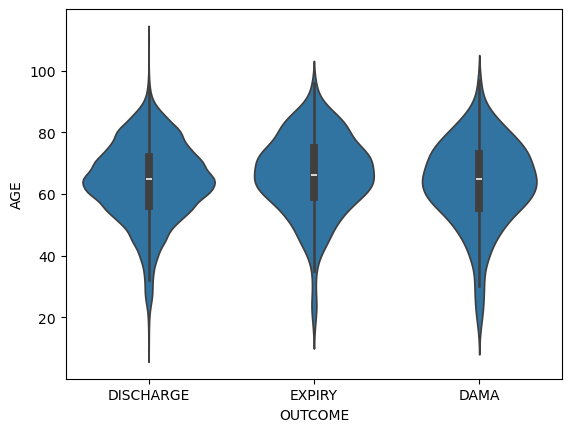

In [46]:
sb.violinplot(x = 'OUTCOME', y = 'AGE', data= health_adm_data_cleaned)
plt.show()


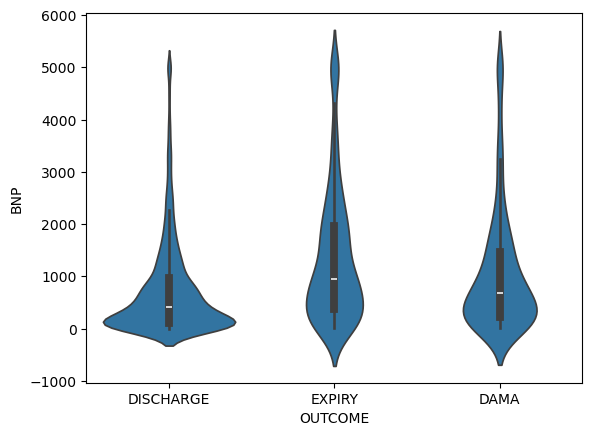

In [47]:
sb.violinplot(x = 'OUTCOME', y = 'BNP', data= health_adm_data_cleaned)
plt.show()


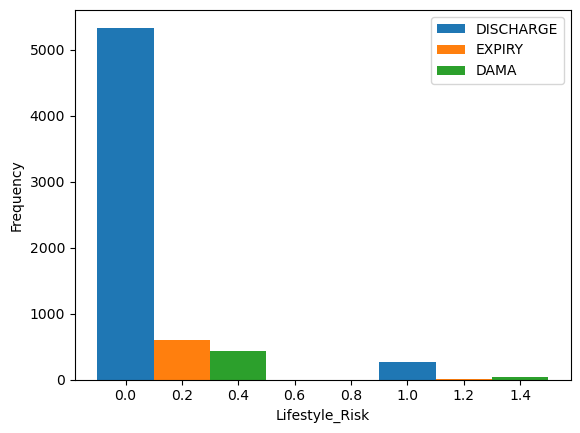

In [48]:
bar1 = np.array([0,1])
out_discharge = np.array([health_adm_data_cleaned[health_adm_data_cleaned['OUTCOME'] == 'DISCHARGE']['ALCOHOL'].value_counts().get(i,0) for i in range(2)])
out_expiry = np.array([health_adm_data_cleaned[health_adm_data_cleaned['OUTCOME'] == 'EXPIRY']['ALCOHOL'].value_counts().get(i,0) for i in range(2)])
out_DAMA = np.array([health_adm_data_cleaned[health_adm_data_cleaned['OUTCOME'] == 'DAMA']['ALCOHOL'].value_counts().get(i,0) for i in range(2)])

w = 0.2
plt.bar(bar1, out_discharge, w, label = "DISCHARGE")

bar2 = [i + w for i in bar1]
bar2
plt.bar(bar2, out_expiry, w, label = "EXPIRY")

bar3 = [i+w for i in bar2]
plt.bar(bar3, out_DAMA, w, label = "DAMA")

plt.xlabel('Lifestyle_Risk')
plt.ylabel('Frequency')
plt.legend()


array([0.36789298, 0.57926829])

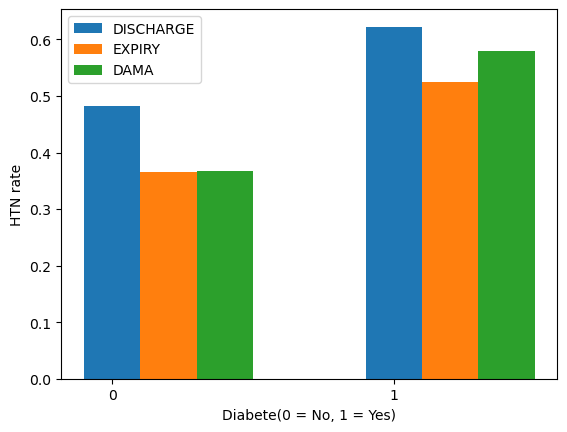

In [49]:
bar1 = np.array([0,1])
out_discharge = np.array([health_adm_data_cleaned[(health_adm_data_cleaned['OUTCOME'] == 'DISCHARGE')
                          &
                          (health_adm_data_cleaned['DM'] == i)
                         ]['HTN'].mean() for i in range(2)])
out_expiry = np.array([health_adm_data_cleaned[(health_adm_data_cleaned['OUTCOME'] == 'EXPIRY')
                          &
                          (health_adm_data_cleaned['DM'] == i)
                         ]['HTN'].mean() for i in range(2)])
out_dama = np.array([health_adm_data_cleaned[(health_adm_data_cleaned['OUTCOME'] == 'DAMA')
                          &
                          (health_adm_data_cleaned['DM'] == i)
                         ]['HTN'].mean() for i in range(2)])
w = 0.2
plt.bar(bar1, out_discharge, w, label = "DISCHARGE")

bar2 = [i + w for i in bar1]
bar2
plt.bar(bar2, out_expiry, w, label = "EXPIRY")

bar3 = [i+w for i in bar2]
plt.bar(bar3, out_dama, w, label = "DAMA")

plt.xlabel('Diabete(0 = No, 1 = Yes)')
plt.ylabel('HTN rate')
plt.legend()
plt.xticks([0, 1])
out_dama

array([0.14715719, 0.27439024])

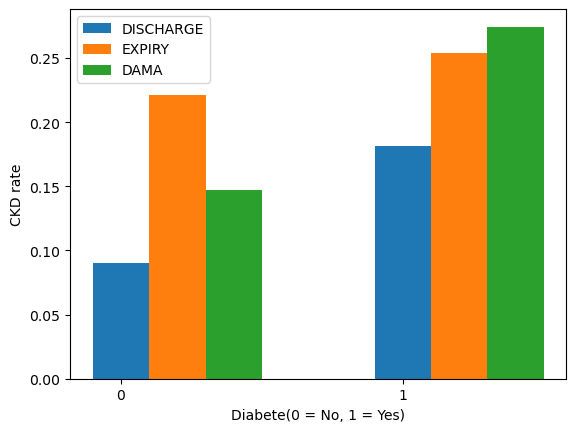

In [50]:
bar1 = np.array([0,1])
out_discharge = np.array([health_adm_data_cleaned[(health_adm_data_cleaned['OUTCOME'] == 'DISCHARGE')
                          &
                          (health_adm_data_cleaned['DM'] == i)
                         ]['CKD'].mean() for i in range(2)])
out_expiry = np.array([health_adm_data_cleaned[(health_adm_data_cleaned['OUTCOME'] == 'EXPIRY')
                          &
                          (health_adm_data_cleaned['DM'] == i)
                         ]['CKD'].mean() for i in range(2)])
out_dama = np.array([health_adm_data_cleaned[(health_adm_data_cleaned['OUTCOME'] == 'DAMA')
                          &
                          (health_adm_data_cleaned['DM'] == i)
                         ]['CKD'].mean() for i in range(2)])
w = 0.2
plt.bar(bar1, out_discharge, w, label = "DISCHARGE")

bar2 = [i + w for i in bar1]
bar2
plt.bar(bar2, out_expiry, w, label = "EXPIRY")

bar3 = [i+w for i in bar2]
plt.bar(bar3, out_dama, w, label = "DAMA")

plt.xlabel('Diabete(0 = No, 1 = Yes)')
plt.ylabel('CKD rate')
plt.legend()
plt.xticks([0, 1])
out_dama

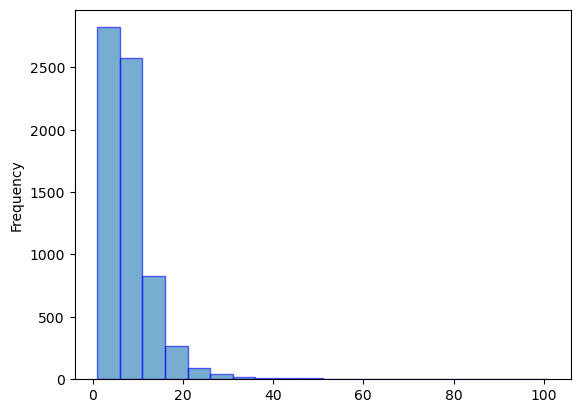

In [51]:
bin_number = np.arange(health_adm_data_cleaned['DURATION OF STAY'].min(),
                      health_adm_data_cleaned['DURATION OF STAY'].max() + 5,
                      5)
bin_number
health_adm_data_cleaned['DURATION OF STAY'].plot(kind = 'hist', bins = bin_number, edgecolor = 'blue', alpha = 0.6)
plt.show()

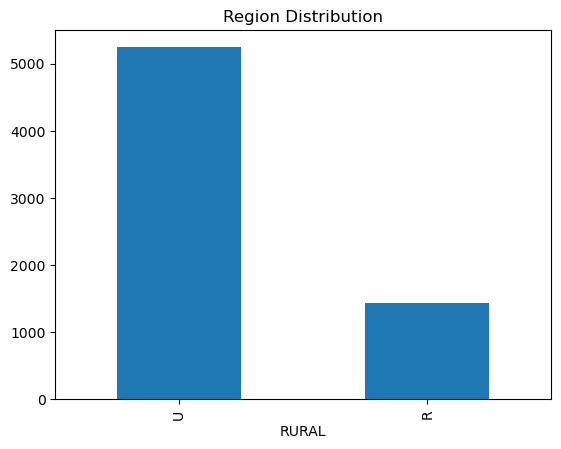

In [52]:
health_adm_data_cleaned['RURAL'].value_counts().plot(kind = 'bar')
plt.title('Region Distribution')
plt.show()

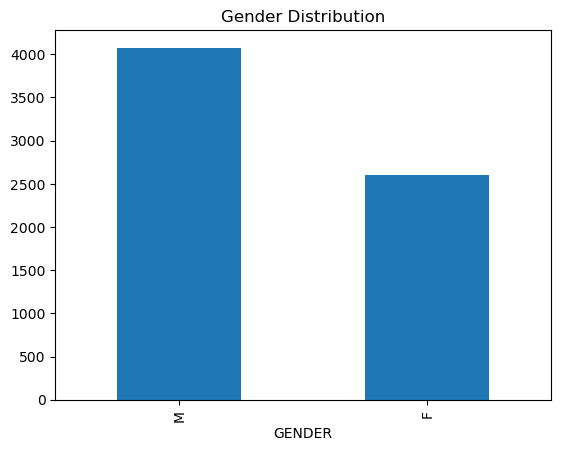

In [53]:
health_adm_data_cleaned['GENDER'].value_counts().plot(kind = 'bar')
plt.title('Gender Distribution')
plt.show()

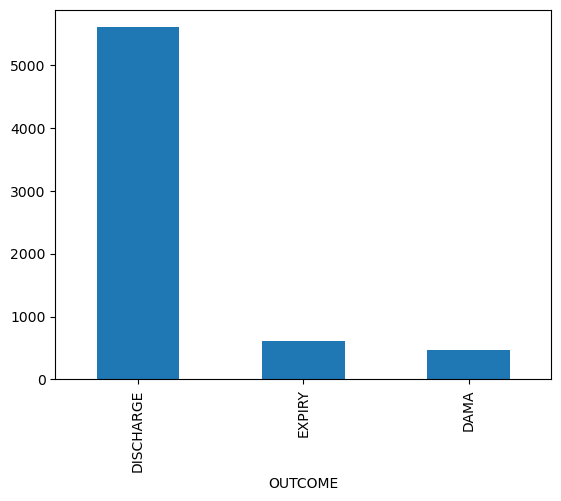

In [54]:
health_adm_data_cleaned['OUTCOME'].value_counts().plot(kind = 'bar')
plt.show()

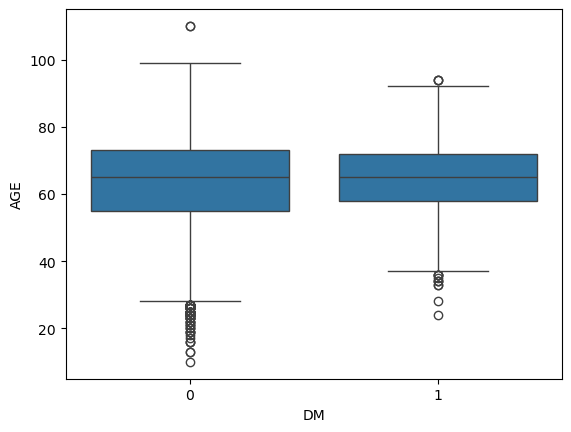

In [55]:
sb.boxplot(x = 'DM', y = 'AGE', data= health_adm_data_cleaned)
plt.show()


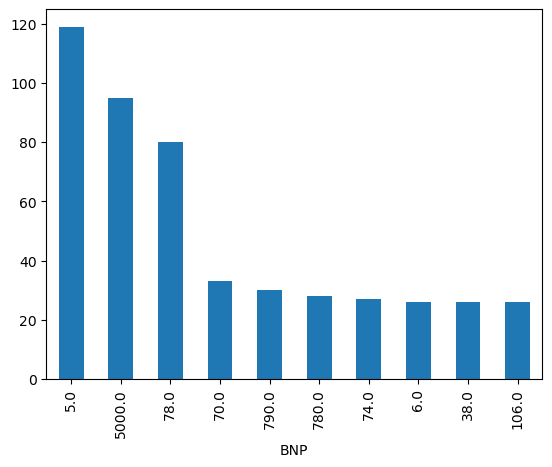

In [56]:
health_adm_data_cleaned['BNP'].value_counts().nlargest(10).plot(kind = 'bar')
plt.show()

In [57]:
health_adm_data_cleaned.columns

Index(['SNO', 'AGE', 'GENDER', 'RURAL', 'TYPE OF ADMISSION-EMERGENCY/OPD',
       'DURATION OF STAY', 'OUTCOME', 'SMOKING ', 'ALCOHOL', 'DM', 'HTN',
       'CAD', 'CKD', 'BNP', 'ANAEMIA', 'ACS', 'HEART FAILURE', 'AKI', 'SHOCK',
       'CHEST INFECTION', 'Lifestyle_Risks'],
      dtype='object')

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
x = health_adm_data_cleaned.drop(columns=['OUTCOME'])
y = health_adm_data_cleaned['OUTCOME']

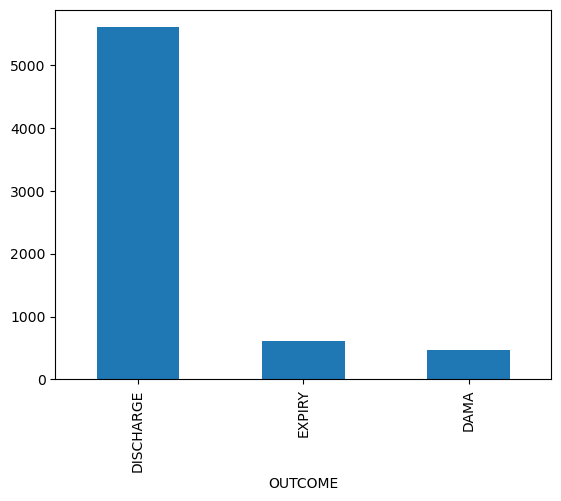

In [60]:
y.value_counts().plot(kind = 'bar')
plt.show()

In [61]:
from imblearn.over_sampling import SMOTE

In [62]:
# Identify categorical and numerical columns
categorical_col = x.select_dtypes(include=['object']).columns
numerical_col = x.select_dtypes(exclude=['object']).columns

# Separate categorical and numerical data
x_categorical = x[categorical_col]
x_numerical = x[numerical_col]


In [63]:
x_numerical
x_categorical

,GENDER,RURAL,TYPE OF ADMISSION-EMERGENCY/OPD
0,M,R,E
2,M,U,E
4,F,U,E
5,M,U,E
6,F,U,E
...,...,...,...
15752,F,U,O
15753,M,R,E
15754,M,U,E
15755,F,U,O


In [64]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTENC
from collections import Counter

#one HotEncoder -> 0, 1
label_encoders = {}
for col in categorical_col:
    le = LabelEncoder()
    x[col] = le.fit_transform(x[col])
    label_encoders[col] = le
    

## HANDLING CLASS IMBALANCE

In [66]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25, stratify=y, random_state=42)

### TOMEK

In [68]:
#TOMEK
from imblearn.under_sampling import TomekLinks
tomek = TomekLinks(sampling_strategy='majority')
x_resampled, y_resampled = tomek.fit_resample(x_train,y_train)

### SMOTENC

In [70]:
categorical_indicies = [x_train.columns.get_loc(col) for col in categorical_col]
categorical_indicies


[2, 3, 4]

In [71]:
#SMOTENC: for categorical variables
smotenc = SMOTENC(categorical_features=categorical_indicies, random_state=42)
x_resampled, y_resampled = smotenc.fit_resample(x_train, y_train)

In [72]:
x_resampled

,SNO,AGE,GENDER,RURAL,TYPE OF ADMISSION-EMERGENCY/OPD,DURATION OF STAY,SMOKING,ALCOHOL,DM,HTN,CAD,CKD,BNP,ANAEMIA,ACS,HEART FAILURE,AKI,SHOCK,CHEST INFECTION,Lifestyle_Risks
0,867,67,1,1,0,9,0,0,1,1,1,0,1190.000000,0,0,0,0,0,1190.000000,0
1,1485,81,1,1,0,8,0,0,1,0,0,0,2080.000000,0,1,1,0,1,2080.000000,0
2,5663,58,1,1,0,1,0,0,0,0,0,0,766.000000,0,0,1,0,1,766.000000,0
3,6600,94,1,0,0,4,0,0,0,1,1,0,1730.000000,0,1,1,1,0,1730.000000,0
4,5654,71,1,1,0,2,0,0,0,1,1,0,31.000000,0,1,1,1,1,31.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12601,2426,67,1,1,0,2,0,0,0,1,0,0,1255.687658,0,1,1,1,0,1255.687658,0
12602,3140,69,0,1,0,3,0,0,0,0,0,0,747.362558,0,0,1,1,0,747.362558,0
12603,3667,79,1,1,0,13,0,0,0,1,0,0,46.626591,0,1,0,1,0,46.626591,0
12604,2319,50,0,1,0,6,0,0,0,0,0,0,4462.808227,0,1,1,1,0,4462.808227,0


In [73]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [74]:
features = ['SNO', 'AGE', 'GENDER', 'RURAL', 'TYPE OF ADMISSION-EMERGENCY/OPD','SMOKING ', 'ALCOHOL', 'DM', 'HTN',
       'CAD', 'CKD', 'BNP', 'ANAEMIA', 'ACS', 'HEART FAILURE', 'AKI', 'SHOCK', 'Lifestyle_Risks']
x_resampled = x_resampled[features]

## DECISION TREE Model

In [76]:
#DECISION TREE Model
dtree = DecisionTreeClassifier()
dtree = dtree.fit(x_resampled, y_resampled)
#tree.plot_tree(dtree, feature_names=features)

In [77]:
dt_prediction = dtree.predict(x_test[features])

In [78]:
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(y_test, dt_prediction))

              precision    recall  f1-score   support

        DAMA       0.14      0.28      0.19       116
   DISCHARGE       0.90      0.79      0.85      1400
      EXPIRY       0.43      0.59      0.50       153

    accuracy                           0.74      1669
   macro avg       0.49      0.56      0.51      1669
weighted avg       0.81      0.74      0.77      1669



### RANDOM FOREST Model

In [80]:
#RANDOM FOREST Model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_resampled[features], y_resampled)

RandomForestClassifier(random_state=42)

In [81]:
rf_prediction = rf.predict(x_test[features])

In [82]:
print(classification_report(y_test, rf_prediction))

              precision    recall  f1-score   support

        DAMA       0.20      0.24      0.22       116
   DISCHARGE       0.91      0.87      0.89      1400
      EXPIRY       0.58      0.67      0.62       153

    accuracy                           0.81      1669
   macro avg       0.56      0.60      0.58      1669
weighted avg       0.83      0.81      0.82      1669



### SVC

In [84]:
from sklearn.svm import SVC

In [85]:
svm = SVC(random_state = 42)

In [86]:
svm.fit(x_resampled[features], y_resampled)
svm_pred = svm.predict(x_test[features])

In [87]:
print(classification_report(y_test, svm_pred))

              precision    recall  f1-score   support

        DAMA       0.11      0.22      0.15       116
   DISCHARGE       0.90      0.56      0.69      1400
      EXPIRY       0.17      0.61      0.26       153

    accuracy                           0.54      1669
   macro avg       0.39      0.46      0.37      1669
weighted avg       0.78      0.54      0.61      1669



### XGBOOST

In [89]:
pip install xgboost

In [90]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder


In [91]:
label_encoder = LabelEncoder()
#encoding categorical column -> numerical column
y_resampled_encoded = label_encoder.fit_transform(y_resampled)   
y_test_encoded = label_encoder.transform(y_test)


In [92]:
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric="logloss")
xgb_model.fit(x_resampled[features], y_resampled_encoded)

#PREDICTING
xgb_model_pred = xgb_model.predict(x_test[features])
xgb_pred_labels = label_encoder.inverse_transform(xgb_model_pred)
print(classification_report(y_test, xgb_pred_labels))

C:\Users\USER\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:50:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


              precision    recall  f1-score   support

        DAMA       0.16      0.23      0.19       116
   DISCHARGE       0.89      0.84      0.87      1400
      EXPIRY       0.49      0.59      0.54       153

    accuracy                           0.78      1669
   macro avg       0.52      0.56      0.53      1669
weighted avg       0.81      0.78      0.79      1669

